In [21]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interpolate
from craftroom import resample
# import stistools
from astropy.convolution import convolve, Box1DKernel
from astropy.modeling import models, fitting
from scipy.io.idl import readsav
from astropy.convolution import convolve_fft
from astropy.convolution import Gaussian1DKernel
from matplotlib.gridspec import GridSpec

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20


How to make the 1A version. Scipi or craftroom? How to make the instruments combine at the ends.

In [2]:
# data = fits.getdata('/media/david/1tb_storage1/emergency_data/mega_muscles/hlsp/2MASS-J23062928-0502285/components_v1/hlsp_muscles_multi_multi_trappist-1_broadband_v2_var-res-sed.fits',1)
data= Table.read('test_to_fits/t1_table_test.ecsv')

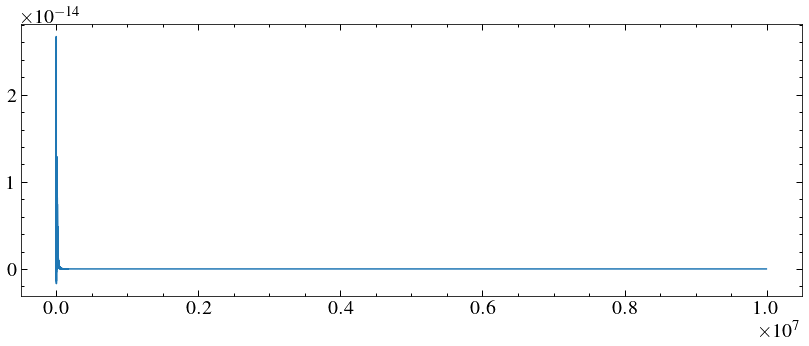

In [22]:
plt.plot(data['WAVELENGTH'],data['FLUX'])

In [4]:
#craftroom or scipy

In [5]:
w, f, e = data['WAVELENGTH'],data['FLUX'],data['ERROR']

In [6]:
from craftroom import resample

In [7]:
import math as mt

In [8]:
print(w[0],w[-1])

14.100000381469727 9995000.0


In [9]:
start, end= mt.ceil(w[0]), mt.floor(w[-1])
print(start,end)

15 9995000


In [10]:
neww = np.arange(start,end+1, 1)

In [23]:
f1 = interpolate.interp1d(w, f, fill_value='extrapolate')(neww)
w2, f2, e2 = resample.bintogrid(w, f, newx=neww, unc= e)

In [12]:
og = np.trapz(f,w)
sp = np.trapz(f1, neww)
cr =np.trapz(f2,w2)
print(og, sp,cr)
print(og/sp)
print(og/cr)

1.170614652905654e-10 1.1704866534688444e-10 1.1706070375192362e-10
1.000109355742272
1.0000065055019949


In [13]:
data.dtype.names

('WAVELENGTH',
 'WAVELENGTH0',
 'WAVELENGTH1',
 'FLUX',
 'ERROR',
 'EXPTIME',
 'DQ',
 'EXPSTART',
 'EXPEND',
 'INSTRUMENT',
 'NORMFAC',
 'BOLOFLUX',
 'BOLOERR')

In [14]:
data['INSTRUMENT']

2048
2048
2048
2048
2048
2048
2048
2048
32768
32768
32768


In [15]:
i2 = interpolate.interp1d(w, data['INSTRUMENT'], kind = 'previous')(w2)

In [16]:
[print (wi, ii) for wi, ii in zip(w[100:200], data['INSTRUMENT'][100:200])]

79.51000213623047 32768
80.0199966430664 32768
80.52999877929688 32768
81.05000305175781 32768
81.58000183105469 32768
82.12000274658203 32768
82.66000366210938 32768
83.20999908447266 32768
83.7699966430664 32768
84.33000183105469 32768
84.9000015258789 32768
85.4800033569336 32768
86.06999969482422 32768
86.66000366210938 32768
87.2699966430664 32768
87.87999725341797 32768
88.5 32768
89.12999725341797 32768
89.7699966430664 32768
90.41999816894531 32768
91.08000183105469 32768
91.73999786376953 32768
92.41999816894531 32768
93.11000061035156 32768
93.80000305175781 32768
94.51000213623047 32768
95.2300033569336 32768
95.95999908447266 32768
96.69999694824219 32768
97.44999694824219 32768
98.22000122070312 32768
98.98999786376953 32768
99.77999877929688 32768
100.5999984741211 32768
101.4000015258789 32768
102.19999694824219 32768
103.0999984741211 32768
103.9000015258789 32768
104.80000305175781 32768
105.69999694824219 32768
106.5999984741211 32768
107.5 32768
108.4000015258789 327

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [17]:
[print (wi, ii) for wi, ii in zip(w2[:50], i2[:50])]

15 2048.0
16 2048.0
17 2048.0
18 2048.0
19 2048.0
20 2048.0
21 2048.0
22 2048.0
23 2048.0
24 2048.0
25 2048.0
26 2048.0
27 2048.0
28 2048.0
29 2048.0
30 2048.0
31 2048.0
32 2048.0
33 2048.0
34 2048.0
35 2048.0
36 2048.0
37 2048.0
38 2048.0
39 2048.0
40 2048.0
41 2048.0
42 2048.0
43 2048.0
44 2048.0
45 2048.0
46 2048.0
47 2048.0
48 2048.0
49 2048.0
50 2048.0
51 32768.0
52 32768.0
53 32768.0
54 32768.0
55 32768.0
56 32768.0
57 32768.0
58 32768.0
59 32768.0
60 32768.0
61 32768.0
62 32768.0
63 32768.0
64 32768.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [18]:
for i in range(len(i2)-1):
    if i2[i] != i2[i+1]:
        i2[i] = i2[i] + i2[i+1]

In [19]:
[print (wi, ii) for wi, ii in zip(w2[100:200], i2[100:200])]

115 32768.0
116 32768.0
117 32768.0
118 32768.0
119 16809984.0
120 16777216.0
121 16777216.0
122 16777216.0
123 16777216.0
124 16777216.0
125 16777216.0
126 16777216.0
127 16777216.0
128 16777216.0
129 16777216.0
130 16777216.0
131 16777216.0
132 16777216.0
133 16777216.0
134 16777216.0
135 16777216.0
136 16777216.0
137 16777216.0
138 16777216.0
139 16777216.0
140 16777216.0
141 16777216.0
142 16777216.0
143 16777216.0
144 16777216.0
145 16777216.0
146 16777216.0
147 16777216.0
148 16777216.0
149 16777216.0
150 16777216.0
151 16777216.0
152 16777216.0
153 16777216.0
154 16777216.0
155 16777216.0
156 16777216.0
157 16777216.0
158 16777216.0
159 16777216.0
160 16777216.0
161 16777216.0
162 16777216.0
163 16777216.0
164 16777216.0
165 16777216.0
166 16777216.0
167 16777216.0
168 16777216.0
169 16777216.0
170 16777216.0
171 16777216.0
172 16777216.0
173 16777216.0
174 16777216.0
175 16777216.0
176 16777216.0
177 16777216.0
178 16777216.0
179 16777216.0
180 16777216.0
181 16777216.0
182 167

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [31]:
a = [200, 200, 200, 150]
b = [1, 2, 3,4]
c = [1.2, 2.4, 3.6]
d = interpolate.interp1d(b, a, fill_value='extrapolate')(c)
print(d)

[200. 200. 170.]


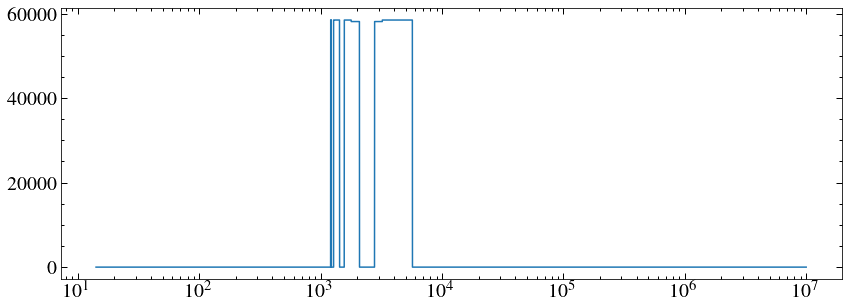

In [37]:
plt.plot(data['WAVELENGTH'], data['EXPSTART'])
plt.xscale('log')

In [53]:
x1 = np.arange(1, 11, 0.1)
x2 = np.arange(1, 11, 1)
y1 = np.hstack((np.full(10, 30), np.full(60, 25), np.full(30, 15)))
up = interpolate.interp1d(x1, y1, kind='next')(x2)
down = interpolate.interp1d(x1, y1, kind='previous')(x2)
print(up)
print(down)
print(np.min([up, down], axis=0))
print(np.max([up, down], axis=0))


[30. 25. 25. 25. 25. 25. 25. 15. 15. 15.]
[30. 30. 25. 25. 25. 25. 25. 25. 15. 15.]
[30. 25. 25. 25. 25. 25. 25. 15. 15. 15.]
[30. 30. 25. 25. 25. 25. 25. 25. 15. 15.]
[30. 25. 25. 25. 25. 25. 25. 15. 15. 15.]
